# Arabic Handwritten Recognition

## Overview
The automatic recognition of text on scanned images has enabled many applications such as searching for words in large volumes of documents, automatic sorting of postal mail, and convenient editing of previously printed documents.

The domain of handwriting in the Arabic script presents unique technical challenges and has been addressed more recently than other domains. Many different methods have been proposed and applied to various types of images.

Here we will focus on the recognition part of handwritten Arabic letters and digits recognition that face several challenges, including the unlimited variation in human handwriting and the large public databases.

In this project we will employ several deep learning models to classify a the images to an arabic letter or digit.



## Dataset
The dataset for this project originates from kaggle kernels which include
**[Arabic Digits](https://www.kaggle.com/mloey1/ahdd1)** and **[Arabic Letters](https://www.kaggle.com/mloey1/ahcd1)**.

All the datasets are CSV files representing the image pixels values and their corresponding label.

Here are some more details about the datasets:

* **Arabic Digits Dataset represents MADBase** (modified Arabic handwritten digits database) which contains **60,000 training images, and 10,000 test images**. MADBase was **written by 700 writers**. Each writer wrote each digit (from 0 -9) ten times. To ensure including different writing styles, the database was gathered from different institutions: Colleges of Engineering and Law, School of Medicine, the Open University (whose students span a wide range of ages), a high school, and a governmental institution. MADBase is available for free and can be downloaded from [here](http://datacenter.aucegypt.edu/shazeem/).

* **Arabic Letters Dataset is composed of 16,800 characters written by 60 participants**, the age range is between 19 to 40 years, and 90% of participants are right-hand. Each participant wrote each character (from ’alef’ to ’yeh’) ten times. The images were scanned at the resolution of 300 dpi. Each block is segmented automatically using Matlab 2016a to determining the coordinates for each block. **The dataset is partitioned into two sets: a training set of 13,440 characters to 480 images per class and a test set of 3,360 characters to 120 images per class**. Writers of training set and test set are exclusive. Ordering of including writers to test set are randomized to make sure that writers of test set are not from a single institution to ensure variability of the test set.

## Data Exploration


1. We need to mount to google drive to be able to use the uploaded dataset files.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import libraries necessary for this project.


In [ ]:
# Import main libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import libraries needed for reading image and processing it
import csv
from PIL import Image
from scipy.ndimage import rotate

# Pretty display for notebooks
%matplotlib inline

3. Load the dataset files into dataframes to be used later in the project

### Loading Arabic Letters Dataset

In [ ]:
# Training letters images and labels files
# letters_training_images_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Characters Dataset CSV/training images.zip"
letters_training_images_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Characters Dataset/Arabic Handwritten Characters Dataset CSV/training images.zip"
# letters_training_labels_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Characters Dataset CSV/training labels.zip"
letters_training_labels_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Characters Dataset/Arabic Handwritten Characters Dataset CSV/training labels.zip"
# Testing letters images and labels files
# letters_testing_images_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Characters Dataset CSV/testing images.zip"
letters_testing_images_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Characters Dataset/Arabic Handwritten Characters Dataset CSV/testing images.zip"

# letters_testing_labels_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Characters Dataset CSV/testing labels.zip"
letters_testing_labels_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Characters Dataset/Arabic Handwritten Characters Dataset CSV/testing labels.zip"


# Loading dataset into dataframes
training_letters_images = pd.read_csv(letters_training_images_file_path, compression='zip', header=None)
training_letters_labels = pd.read_csv(letters_training_labels_file_path, compression='zip', header=None)
testing_letters_images = pd.read_csv(letters_testing_images_file_path, compression='zip', header=None)
testing_letters_labels = pd.read_csv(letters_testing_labels_file_path, compression='zip', header=None)

# print statistics about the dataset
# print(training_letters_images[0].shape)
# print(testing_letters_images[0].shape)
training_letters_images.head()
# print(type(training_letters_images))

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Loading Arabic Digits Dataset

In [ ]:
# # Training digits images and labels files
# # digits_training_images_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Digits Dataset CSV/training images.zip"
# digits_training_images_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Digits Dataset/Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv"
# # digits_training_labels_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Digits Dataset CSV/training labels.zip"
# digits_training_labels_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Digits Dataset/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv"
# # Testing digits images and labels files
# # digits_testing_images_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Digits Dataset CSV/testing images.zip"
# digits_testing_images_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Digits Dataset/Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv"
# # digits_testing_labels_file_path = "drive/My Drive/Capstone Project/Datasets/Arabic Handwritten Digits Dataset CSV/testing labels.zip"
# digits_testing_labels_file_path = "/content/drive/MyDrive/2ABDOH Script/Dataset/Arabic Handwritten Digits Dataset/Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv"

# # Loading dataset into dataframes
# training_digits_images = pd.read_csv(digits_training_images_file_path, header=None)
# training_digits_labels = pd.read_csv(digits_training_labels_file_path, header=None)
# testing_digits_images = pd.read_csv(digits_testing_images_file_path, header=None)
# testing_digits_labels = pd.read_csv(digits_testing_labels_file_path, header=None)
# num_columns_to_extend = 1023 - 783

# malek = []

# # Extend the columns with zeros
# for i in range(784):
#     malek.append(training_digits_images[i])

# for i in range(32):
#   for j in range(8):
#     # if(i%28==0 or i%29==0 or i%30==0 or i%31==0):
#       malek.insert(i*28+28,0)

# malek = malek[:1024]

# print(len(malek))
# for i in range(1024):
#     training_digits_images[i] = malek[i]
# # # Extend the columns with zeros
# # for i in range(num_columns_to_extend):
# #     testing_digits_images[i + 784] = 0


# # print statistics about the dataset
# # print(training_digits_images.loc[0]+ [0,0,0,0,0])
# # print(testing_digits_images.shape[0])
# training_digits_images.head()
# # testing_digits_images.head()



### Convert csv values to an image
Writting a method to be used later if we want visualization of an image from its pixels values.

In [ ]:
def convert_values_to_image(image_values, display=False):
  image_array = np.asarray(image_values)
  image_array = image_array.reshape(32, 32).astype('uint8')
  # The original dataset is reflected so we will flip it then rotate for a better view only.
  image_array = np.flip(image_array, 0)
  image_array = rotate(image_array, -90)
  new_image = Image.fromarray(image_array)
  if display == True:
    new_image.show()
  return new_image

### Visualizing some examples

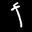

In [ ]:
convert_values_to_image(training_letters_images.loc[0], True)

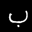

In [ ]:
convert_values_to_image(training_letters_images.loc[12], True)

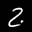

In [ ]:
convert_values_to_image(training_letters_images.loc[37], True)

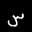

In [ ]:
convert_values_to_image(training_letters_images.loc[3000], True)

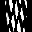

In [ ]:
convert_values_to_image(training_digits_images.loc[0], True)

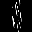

In [ ]:
convert_values_to_image(training_digits_images.loc[2], True)

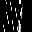

In [ ]:
convert_values_to_image(training_digits_images.loc[7], True)

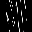

In [ ]:
convert_values_to_image(training_digits_images.loc[9], True)

## Data Preprocessing

### Image Normalization
We rescale the images by dividing every pixel in the image by 255 to make them into range [0, 1]

In [ ]:
# training_digits_images_scaled = training_digits_images.values.astype('float32')/255
# training_digits_labels = training_digits_labels.values.astype('int32')
# testing_digits_images_scaled = testing_digits_images.values.astype('float32')/255
# testing_digits_labels = testing_digits_labels.values.astype('int32')

training_letters_images_scaled = training_letters_images.values.astype('float32')/255
training_letters_labels = training_letters_labels.values.astype('int32')
testing_letters_images_scaled = testing_letters_images.values.astype('float32')/255
testing_letters_labels = testing_letters_labels.values.astype('int32')

In [ ]:
print("Training images of digits after scaling")
print(training_digits_images_scaled.shape)
training_digits_images_scaled[0:5]

In [ ]:
print("Training images of letters after scaling")
print(training_letters_images_scaled.shape)
training_letters_images_scaled[0:5]

Training images of letters after scaling
(13440, 1024)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Encoding Categorical Labels
From the labels csv files we can see that labels are categorical values and it is a multi-class classification problem.

Our outputs are in the form of:
* Digits from 0 to 9 have categories numbers from 0 to 9
* Letters from ’alef’ to ’yeh’ have categories numbers from 10 to 37

**Here we will encode these categories values using One Hot Encoding with keras.**

One-hot encoding transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.



In [ ]:
from keras.utils import to_categorical

import numpy as np

# max_label = np.amax(training_digits_labels)
# print("Maximum label value:", max_label)

# max_training_label = np.amax(training_letters_labels)
# max_testing_label = np.amax(testing_letters_labels)
# # y= np.amax(testing_digits_images)
# # x = np.amax(testing_digits_labels)
# print("Max Training Label is:", max_training_label)
# print("Max Testing Label is:", max_testing_label)
# # print("no.", testing_digits_labels)
# print(x)
# print(y)
# print(training_letters_labels)



# one hot encoding
# number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
number_of_classes = 29
training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
# training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
# testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)



# from keras.utils import to_categorical

# # number of classes = 10 (digits classes) + 28 (arabic alphabet classes)
# number_of_classes = 38

# max_label_test_digits = np.amax(testing_digits_labels)
# print("Maximum label value in testing_digits_labels:", max_label_test_digits)


# # one hot encoding
# training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
# testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
# training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
# testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)




# import numpy as np
# from keras.utils import to_categorical

# # Define the number of classes
# number_of_digit_classes = 10
# number_of_arabic_alphabet_classes = 28
# number_of_classes = number_of_digit_classes + number_of_arabic_alphabet_classes

# # Check the maximum label value for training_digits_labels
# max_label_train_digits = np.amax(training_digits_labels)
# # Check the maximum label value for testing_digits_labels
# max_label_test_digits = np.amax(testing_digits_labels)

# # If any label exceeds the valid range, correct it
# max_label_digits = max(max_label_train_digits, max_label_test_digits)
# if max_label_digits >= number_of_classes:
#     print("Some labels in digits exceed the valid range. Adjusting...")

#     # Adjust the labels to ensure they are within the valid range
#     training_digits_labels = np.minimum(training_digits_labels, number_of_classes - 1)
#     testing_digits_labels = np.minimum(testing_digits_labels, number_of_classes - 1)

#     print("Labels adjusted.")

# # Perform one-hot encoding
# training_letters_labels_encoded = to_categorical(training_letters_labels, num_classes=number_of_classes)
# testing_letters_labels_encoded = to_categorical(testing_letters_labels, num_classes=number_of_classes)
# training_digits_labels_encoded = to_categorical(training_digits_labels, num_classes=number_of_classes)
# testing_digits_labels_encoded = to_categorical(testing_digits_labels, num_classes=number_of_classes)


In [ ]:
print(training_digits_labels_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Reshaping Input Images to 64x64x1


When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape
(nb_samples,rows,columns,channels)

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

**So we will reshape the input images to a 4D tensor with shape
(nb_samples, 64, 64 ,1)** as we use grayscale images of 64x64 pixels.

In [ ]:
# reshape input digit images to 64x64x1
# training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
# testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# reshape input letter images to 64x64x1
training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 32, 32, 1])
testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 32, 32, 1])

# print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)




# # # reshape input digit images to 64x64x1
# # training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
# # testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# # reshape input letter images to 64x64x1
# training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
# testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

# # print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
# print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)


# # # reshape input digit images to 64x64x1
# # training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
# # testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])
# # Check the shape of training_digits_images_scaled and testing_digits_images_scaled
# # print("Shape of training_digits_images_scaled:", training_digits_images_scaled.shape)
# # print("Shape of testing_digits_images_scaled:", testing_digits_images_scaled.shape)

# # # reshape input digit images to 64x64x1
# # training_digits_images_scaled = training_digits_images_scaled.reshape([-1, 64, 64, 1])
# # testing_digits_images_scaled = testing_digits_images_scaled.reshape([-1, 64, 64, 1])

# # # Verify the shape after reshaping
# # print("Shape of training_digits_images_scaled after reshaping:", training_digits_images_scaled.shape)
# # print("Shape of testing_digits_images_scaled after reshaping:", testing_digits_images_scaled.shape)

# # training_digits_images_scaled = training_digits_images_scaled.reshape(-1, 28, 28)
# # testing_digits_images_scaled = testing_digits_images_scaled.reshape(-1, 28, 28)

# # # Reshape to 64x64 and add channel dimension
# # training_digits_images_scaled = np.expand_dims(training_digits_images_scaled, axis=-1)
# # testing_digits_images_scaled = np.expand_dims(testing_digits_images_scaled, axis=-1)

# # # Resize images to 64x64
# # training_digits_images_scaled = np.array([np.resize(image, (64, 64)) for image in training_digits_images_scaled])
# # testing_digits_images_scaled = np.array([np.resize(image, (64, 64)) for image in testing_digits_images_scaled])

# # # reshape input letter images to 64x64x1
# # training_letters_images_scaled = training_letters_images_scaled.reshape([-1, 64, 64, 1])
# # testing_letters_images_scaled = testing_letters_images_scaled.reshape([-1, 64, 64, 1])

# # print(training_digits_images_scaled.shape, training_digits_labels_encoded.shape, testing_digits_images_scaled.shape, testing_digits_labels_encoded.shape)
# # print(training_letters_images_scaled.shape, training_letters_labels_encoded.shape, testing_letters_images_scaled.shape, testing_letters_labels_encoded.shape)

(13440, 32, 32, 1) (13440, 29) (3360, 32, 32, 1) (3360, 29)


### Merging Letters and Digits Datasets

In [ ]:
# training_data_images = np.concatenate((training_digits_images_scaled, training_letters_images_scaled), axis=0)
# training_data_labels = np.concatenate((training_digits_labels_encoded, training_letters_labels_encoded), axis=0)
# print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
# print(training_data_images.shape, training_data_labels.shape)


# testing_data_images = np.concatenate((testing_digits_images_scaled, testing_letters_images_scaled), axis=0)
# testing_data_labels = np.concatenate((testing_digits_labels_encoded, testing_letters_labels_encoded), axis=0)
# print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
# print(testing_data_images.shape, testing_data_labels.shape)


training_data_images = training_letters_images_scaled
training_data_labels = training_letters_labels_encoded
print("Total Training images are {} images of shape".format(training_data_images.shape[0]))
print(training_data_images.shape, training_data_labels.shape)

testing_data_images = testing_letters_images_scaled
testing_data_labels = testing_letters_labels_encoded
# testing_data_labels = testing_letters_labels_encoded
print("Total Testing images are {} images of shape".format(testing_data_images.shape[0]))
print(testing_data_images.shape, testing_data_labels.shape)


Total Training images are 13440 images of shape
(13440, 32, 32, 1) (13440, 29)
Total Testing images are 3360 images of shape
(3360, 32, 32, 1) (3360, 29)


## Designing Model Architecture

Now we will make a method which creates the model architecture with the specified optimizer and activation functions.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense

def create_model(optimizer='adam', kernel_initializer='he_normal', activation='relu'):
  # create model
  model = Sequential()
  model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32, 32, 1), kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=32, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, padding='same', kernel_initializer=kernel_initializer, activation=activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling2D())

  #Fully connected final layer
  model.add(Dense(29, activation='softmax'))

  # Compile model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
  return model

Let’s understand above code step by step.

* The first hidden layer is a convolutional layer. The layer has 16 feature maps, which with the size of 3×3 and an activation function which is relu. This is the input layer, expecting images with the structure outlined above.
* The second layer is Batch Normalization which solves having distributions of the features vary across the training and test data, which breaks the IID assumption. We use it to help in two ways faster learning and higher overall accuracy.
* The third layer is the MaxPooling layer. MaxPooling layer is used to down-sample the input to enable the model to make assumptions about the features so as to reduce overfitting. It also reduces the number of parameters to learn, reducing the training time.
* The next layer is a Regularization layer using dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
* Another hidden layer with 32 feature maps with the size of 3×3 and a relu activation function to capture more features from the image.
* Other hidden layers with 64 and 128 feature maps with the size of 3×3 and a relu activation function to capture complex patterns from the image which will decribe the digits and letters later.
* More MaxPooling, Batch Normalization, Regularization and GlobalAveragePooling2D layers.
* The last layer is the output layer with 10 neurons (number of output classes) and it uses softmax activation function as we have multi-classes. Each neuron will give the probability of that class.

I used categorical_crossentropy as a loss function because its a multi-class classification problem. I used accuracy as metrics to improve the performance of our neural network.

## Model Summary And Visualization








Let's see the model summary.

In [ ]:
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 16, 16, 32)       

Keras support plotting the model in keras.utils.vis_utils module which provides utility functions to plot a Keras model using graphviz.

To be able to use that utility we should first install pydot and graphviz modules. This can be done by running the following code cell then restart the runtime environment.

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

Now we can plot the model and save it to a file also.

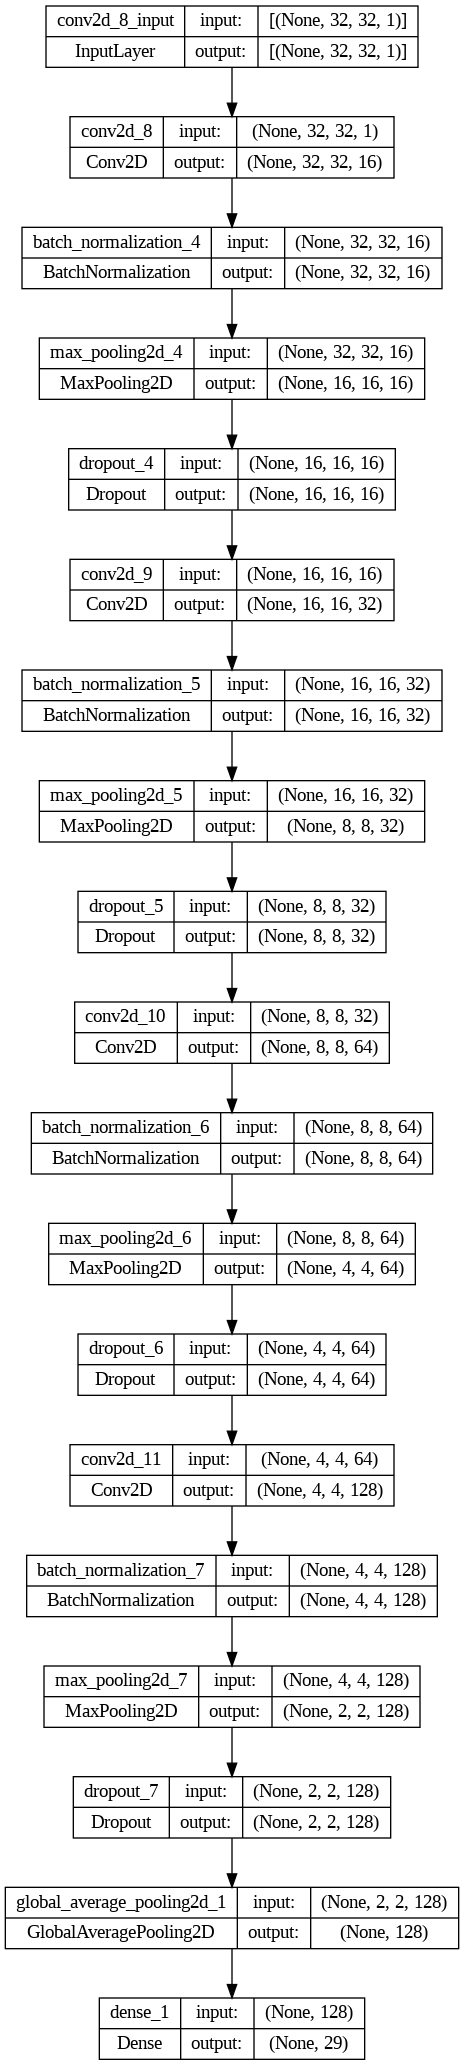

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file="/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model Architecture.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model Architecture.png'))

## Parameters Tuning

We will tune the parameters optimizer, kernel_initializer and activation.




In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define the grid search parameters
optimizer = ['RMSprop', 'Adam', 'Adagrad', 'Nadam']
kernel_initializer = ['normal', 'uniform']
activation = ['relu', 'linear', 'tanh']

param_grid = dict(optimizer=optimizer, kernel_initializer=kernel_initializer, activation=activation)

# count number of different parameters values combinations
parameters_number = 1
for x in param_grid:
  parameters_number = parameters_number * len(param_grid[x])
print("Number of different parameter combinations = {}".format(parameters_number))

Number of different parameter combinations = 24


We will try different models with different parameters to find the best parameter values.

In [ ]:
epochs = 5
batch_size = 20 # 20 divides the training data samples

#creating the models with different hyperparameters
for a,b,c in [(x,y,z) for x in optimizer for z in activation for y in kernel_initializer]:
    params = {'optimizer' : a , 'kernel_initializer' : b , 'activation' : c}
    print(params)
    curr_model = create_model(a, b, c)
    curr_model.fit(training_data_images, training_data_labels,
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1)
    print("=============================================================================")

{'optimizer': 'RMSprop', 'kernel_initializer': 'normal', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 38s 54ms/step - loss: 1.4154 - accuracy: 0.5608 - val_loss: 1.1758 - val_accuracy: 0.5929
Epoch 2/5
672/672 [==============================] - 36s 53ms/step - loss: 0.5292 - accuracy: 0.8256 - val_loss: 0.3833 - val_accuracy: 0.8643
Epoch 3/5
672/672 [==============================] - 30s 45ms/step - loss: 0.3806 - accuracy: 0.8757 - val_loss: 0.2567 - val_accuracy: 0.9196
Epoch 4/5
672/672 [==============================] - 30s 45ms/step - loss: 0.3252 - accuracy: 0.8967 - val_loss: 0.5134 - val_accuracy: 0.8378
Epoch 5/5
672/672 [==============================] - 32s 47ms/step - loss: 0.2792 - accuracy: 0.9092 - val_loss: 7.2369 - val_accuracy: 0.2676
{'optimizer': 'RMSprop', 'kernel_initializer': 'uniform', 'activation': 'relu'}
Epoch 1/5
672/672 [==============================] - 31s 45ms/step - loss: 1.2423 - accuracy: 0.6098 - val_loss: 0.6617 - val_

**From the above results we can see that best parameters are:**
* **Optimizer: Adam**
* **Kernel_initializer: uniform**
* **Activation: relu**

Let's create the model with the best parameters obtained.

In [ ]:
model = create_model(optimizer='Adam', kernel_initializer='uniform', activation='relu')

## Training the Model


### Fitting the Model

Train the model using batch_size=20 to reduce used memory and make the training more quick.
We will train the model first on 10 epochs to see the accuracy that we will obtain.

In [ ]:
from keras.callbacks import ModelCheckpoint

# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5', verbose=1, save_best_only=True)
history = model.fit(training_data_images, training_data_labels,
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=10, batch_size=20, verbose=1, callbacks=[checkpointer])

Epoch 1/10
671/672 [============================>.] - ETA: 0s - loss: 0.1844 - accuracy: 0.9388
Epoch 1: val_loss improved from inf to 1.04806, saving model to /content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5
672/672 [==============================] - 30s 45ms/step - loss: 0.1842 - accuracy: 0.9389 - val_loss: 1.0481 - val_accuracy: 0.6592
Epoch 2/10
  3/672 [..............................] - ETA: 22s - loss: 0.2197 - accuracy: 0.8833

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


672/672 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9431
Epoch 2: val_loss improved from 1.04806 to 0.25269, saving model to /content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5
672/672 [==============================] - 31s 45ms/step - loss: 0.1700 - accuracy: 0.9431 - val_loss: 0.2527 - val_accuracy: 0.9187
Epoch 3/10
671/672 [============================>.] - ETA: 0s - loss: 0.1647 - accuracy: 0.9450
Epoch 3: val_loss improved from 0.25269 to 0.14580, saving model to /content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5
672/672 [==============================] - 31s 46ms/step - loss: 0.1646 - accuracy: 0.9451 - val_loss: 0.1458 - val_accuracy: 0.9580
Epoch 4/10
672/672 [==============================] - ETA: 0s - loss: 0.1653 - accuracy: 0.9442
Epoch 4: val_loss did not improve from 0.14580
672/672 [==============================] - 33s 49ms/step - loss: 0.1653 - ac

In [ ]:
import tensorflow as tf
model.save("/content/drive/MyDrive/2ABDOH Script/Code/Arabic Handwritten Recognition.h5")
new_model = tf.keras.models.load_model("/content/drive/MyDrive/2ABDOH Script/Code/Arabic Handwritten Recognition.h5")
# model = new_model

### Plotting Loss and Accuracy Curves with Epochs

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
  # Loss Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # Accuracy Curves
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'r',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

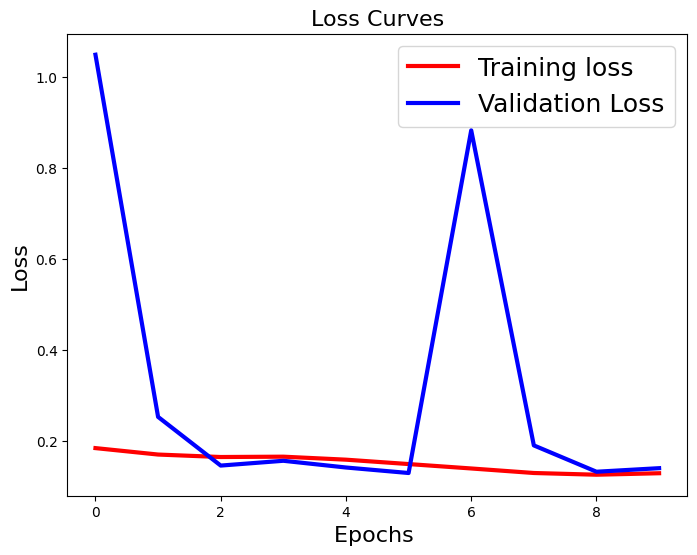

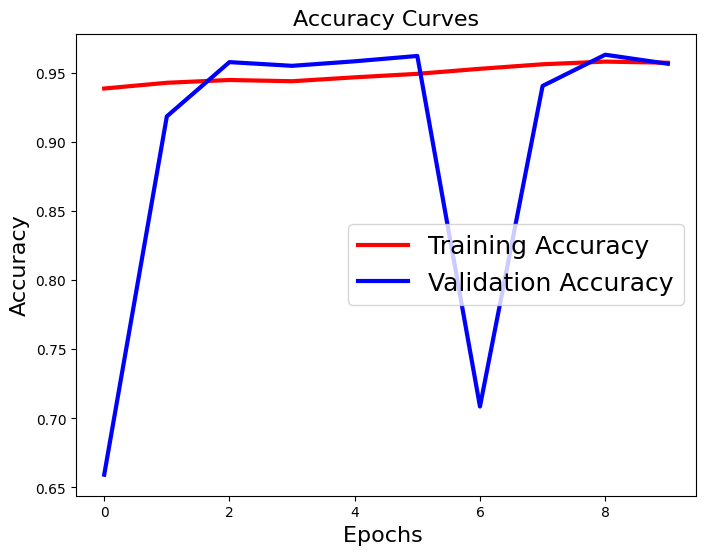

In [ ]:
plot_loss_accuracy(history)

In [ ]:
save_dir = '/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model'
plt.savefig(save_dir + '/Accuracy & Loss Plot 2.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Load the Model with the Best Validation Loss


In [ ]:
model.load_weights('/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5')

## Test the Model


In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 2s 16ms/step - loss: 0.1295 - accuracy: 0.9625
Test Accuracy: 0.9624999761581421
Test Loss: 0.12947013974189758


**We get test accuracy of 98.286% after training on 10 epochs only.**

**What about increasing the epochs we train on ?**

## Training More on the best model

Epoch 1/20
671/672 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9520
Epoch 1: val_loss improved from inf to 0.21136, saving model to /content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5
672/672 [==============================] - 30s 45ms/step - loss: 0.1399 - accuracy: 0.9519 - val_loss: 0.2114 - val_accuracy: 0.9405
Epoch 2/20
671/672 [============================>.] - ETA: 0s - loss: 0.1352 - accuracy: 0.9545
Epoch 2: val_loss did not improve from 0.21136
672/672 [==============================] - 29s 43ms/step - loss: 0.1353 - accuracy: 0.9545 - val_loss: 0.2307 - val_accuracy: 0.9268
Epoch 3/20
671/672 [============================>.] - ETA: 0s - loss: 0.1368 - accuracy: 0.9538
Epoch 3: val_loss improved from 0.21136 to 0.14727, saving model to /content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5
672/672 [==============================] - 32s 48ms/step - loss: 0.13

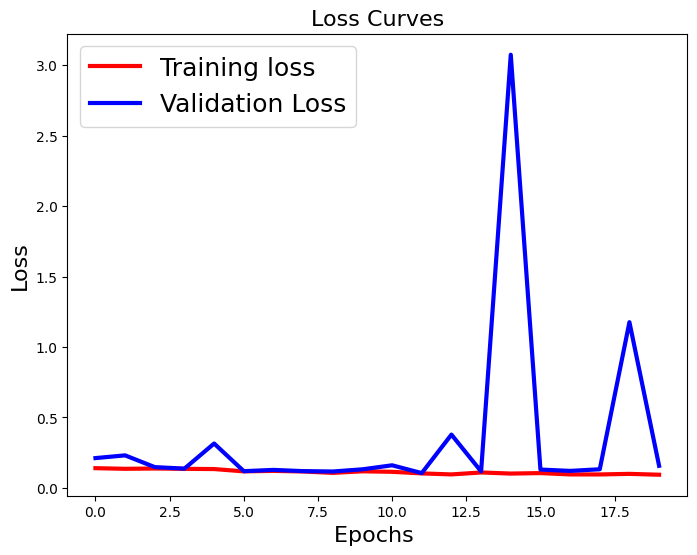

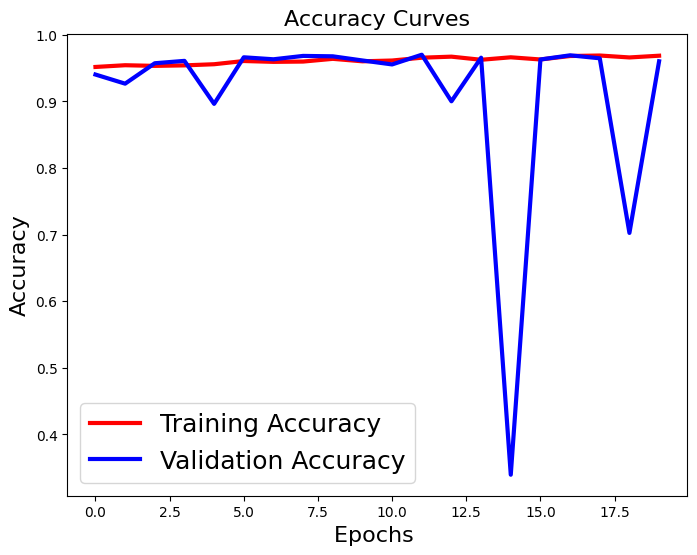

In [ ]:
epochs = 20
batch_size = 20

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5', verbose=1, save_best_only=True)

history = model.fit(training_data_images, training_data_labels,
                    validation_data=(testing_data_images, testing_data_labels),
                    epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[checkpointer])

model.load_weights('/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/weights.hdf5')
plot_loss_accuracy(history)

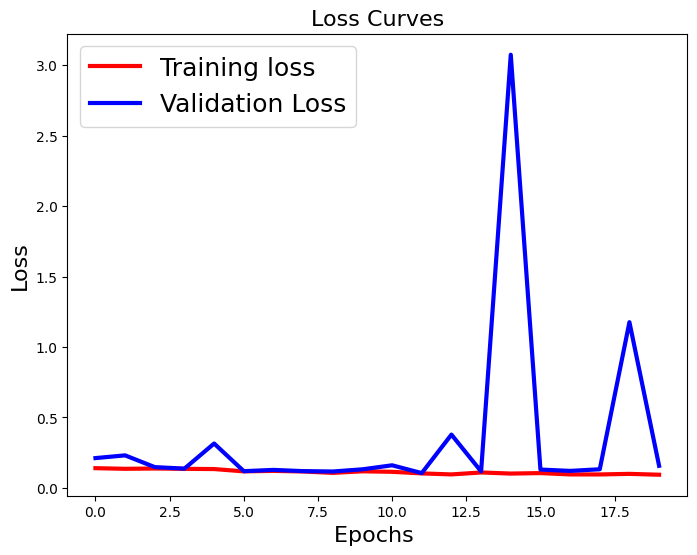

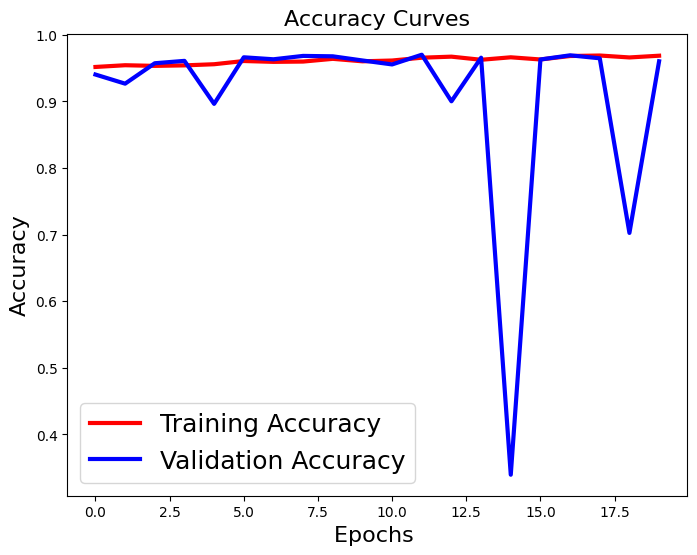

In [ ]:
plot_loss_accuracy(history)

## Testing the Model again

In [ ]:
# Final evaluation of the model
metrics = model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Test Accuracy: {}".format(metrics[1]))
print("Test Loss: {}".format(metrics[0]))

105/105 [==============================] - 2s 16ms/step - loss: 0.1048 - accuracy: 0.9702
Test Accuracy: 0.9702380895614624
Test Loss: 0.10484573990106583


After training the model on more epochs we gained a better model which can classify complex patterns . So when we tested it on our test dataset we had better results than before.

**Test accuracy is improved from 98.286% to 98.862% As we train the model on 20 more epochs.**



## Saving the Final Model

Let's save the model on json format to be used later instead of creating the model again from scratch.

In [ ]:
from keras.models import model_from_yaml

In [ ]:
import os
save_directory = '/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/'

model_json = model.to_json()
json_file_path = os.path.join(save_directory, 'model.json')

with open(json_file_path, "w") as json_file:
    json_file.write(model_json)

Save the model weights to file.

In [ ]:
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/Arabic Handwritten Recognition Model.h5")
print("Saved model to disk")

Saved model to disk


if we want to load the model with the last obtained weights at anytime, we will run the following code cell.

In [ ]:
from tensorflow.keras.models import model_from_json

save_directory = '/content/drive/MyDrive/2ABDOH Script/Code/Models/Arabic Handwritten Recognition Model/'

# Load JSON and create model
json_file = open(os.path.join(save_directory, 'model.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into the new model
loaded_model.load_weights(os.path.join(save_directory, 'Arabic Handwritten Recognition Model.h5'))
print("Loaded model from disk")

# Compile the loaded model
loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

Loaded model from disk


## Benchmark Model

We will use a very simple (vanilla) CNN model as benchmark and Train/test it using the same data that you have used for our model solution.
Then Compare the results between the vanilla model and our complex model.

In [ ]:
baseline_model = Sequential()
baseline_model.add(Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(32, 32, 1), activation='relu')) # Input layer
baseline_model.add(GlobalAveragePooling2D())
baseline_model.add(Dense(29, activation = 'softmax')) # Output layer => output dimension = 29 as it is multi-class

# Compile the baseline model
baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

# Fit the baseline model with training dataset
epochs = 5
batch_size = 20

baseline_model.fit(training_data_images, training_data_labels,
                  validation_data=(testing_data_images, testing_data_labels),
                  epochs=epochs, batch_size=batch_size, verbose=1)

# Test the baseline model
baseline_metrics = baseline_model.evaluate(testing_data_images, testing_data_labels, verbose=1)
print("Baseline Model Test Accuracy: {}".format(baseline_metrics[1]))
print("Baseline Model Test Loss: {}".format(baseline_metrics[0]))


Epoch 1/5
672/672 [==============================] - 7s 10ms/step - loss: 3.3394 - accuracy: 0.0368 - val_loss: 3.3086 - val_accuracy: 0.0372
Epoch 2/5
672/672 [==============================] - 8s 11ms/step - loss: 3.2828 - accuracy: 0.0462 - val_loss: 3.2486 - val_accuracy: 0.0586
Epoch 3/5
672/672 [==============================] - 7s 10ms/step - loss: 3.2188 - accuracy: 0.0721 - val_loss: 3.1797 - val_accuracy: 0.0765
Epoch 4/5
672/672 [==============================] - 8s 12ms/step - loss: 3.1568 - accuracy: 0.0717 - val_loss: 3.1227 - val_accuracy: 0.0854
Epoch 5/5
105/105 [==============================] - 1s 6ms/step - loss: 3.0841 - accuracy: 0.0917
Baseline Model Test Accuracy: 0.09166666865348816
Baseline Model Test Loss: 3.084088087081909


**We get test accuracy of 32.37% from the baseline Model (vanilla). **

## Predict Image Classes

Making a method which takes a model, data and its true labels (optional for using in testing). Then it gives the predicted classes of the given data using the given model.

In [ ]:
def get_predicted_classes(model, data, labels=None):
  image_predictions = model.predict(data)
  predicted_classes = np.argmax(image_predictions, axis=1)
  true_classes = np.argmax(labels, axis=1)
  return predicted_classes, true_classes

## Comparing Evaluation Metrics between Benchmark Model and Final Model

Making a method which will print all metrics (precision, recall, f1-score and support) with each class in the dataset.

In [ ]:
from sklearn.metrics import classification_report

def get_classification_report(y_true, y_pred):
  print(classification_report(y_true, y_pred))

### Evaluating Final Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

### Evaluating Baseline (Benchmark) Model using the specified metrics

In [ ]:
y_pred, y_true = get_predicted_classes(baseline_model, testing_data_images, testing_data_labels)
get_classification_report(y_true, y_pred)

             precision    recall  f1-score   support

          0       0.95      0.84      0.89      1000
          1       0.25      0.90      0.39      1000
          2       0.29      0.23      0.26      1000
          3       0.24      0.28      0.25      1000
          4       0.31      0.29      0.30      1000
          5       0.52      0.73      0.61      1000
          6       0.18      0.37      0.24      1000
          7       0.28      0.64      0.39      1000
          8       0.00      0.00      0.00      1000
          9       0.16      0.03      0.04      1000
         10       0.00      0.00      0.00       120
         11       0.00      0.00      0.00       120
         12       0.00      0.00      0.00       120
         13       0.00      0.00      0.00       120
         14       0.00      0.00      0.00       120
         15       0.00      0.00      0.00       120
         16       0.00      0.00      0.00       120
         17       0.48      0.18      0.27   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## A Demo to see how the model works on examples of the testing data

Let's recall:
* Digits from 0 to 9 were encoded to categorical labels from 0 to 9
* Letters from ’alef’='أ' to ’yeh’='ى' were encoded to categorical labels from 10 to 37

**Recall that we have used One Hot Encoding which transforms integer to a binary matrix where the array contains only one ‘1’ and the rest elements are ‘0’.**

In [ ]:
def get_non_zero_index_from_one_hot_encoding(one_hot_encoding):
  non_zero_index = np.where(one_hot_encoding == 1)[0]
  assert(len(non_zero_index) == 1)
  non_zero_index = non_zero_index[0]
  return non_zero_index

In [ ]:
def convert_categorical_label_to_real_label(categorical_label):
  real_labels = []
  real_labels.extend([x for x in range(10)])
  real_labels.extend(['أ', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ى'])
  return real_labels[categorical_label]

In [ ]:
def show_example(sample_index):
  y_pred, y_true = get_predicted_classes(model, testing_data_images[[sample_index]], testing_data_labels[[sample_index]])
  non_zero_index = get_non_zero_index_from_one_hot_encoding(testing_data_labels[sample_index])
  y_true = y_true[0]
  y_pred = y_pred[0]
  assert y_true == non_zero_index
  true_label = convert_categorical_label_to_real_label(y_true)
  predicted_label = convert_categorical_label_to_real_label(y_pred)
  print("The following image has the written character '{}' but the model predicted it as '{}'".format(true_label, predicted_label))
  return true_label == predicted_label

The following image has the written character '5' but the model predicted it as '5'


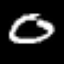

In [ ]:
sample_index = 5
show_example(sample_index)
convert_values_to_image(testing_digits_images.loc[sample_index], True)

The following image has the written character 'ب' but the model predicted it as 'ب'


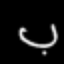

In [ ]:
sample_index = 10002
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True)

The following image has the written character 'د' but the model predicted it as 'د'


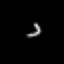

In [ ]:
sample_index = 11414
show_example(sample_index)
convert_values_to_image(testing_letters_images.loc[sample_index - testing_digits_images.shape[0]], True)

## Conclusion

**We built a CNN model which can classify the arabic handwritten images into digits and letters. We tested the model on more than 13000 image with all possible classes and got very high accuracy of 98.86%.**